Sentiment Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import string
import re
import nltk

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\modug\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\modug\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\modug\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\modug\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\modug\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [6]:
df_train = pd.read_csv('train.csv', encoding='latin1')
df_train.head(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


In [7]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
None


In [8]:
#checking for null values
df_train.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [9]:
# we can do two things when we got encountered with null values we can either drop them or fill them
#As the null values are less and dataset is large we can remove those null values also we cannot replace them with mean as these col are text data
df_train.dropna(inplace=True)

In [10]:
#checking for duplicates as it might cause Bias on the model
# if we have duuplicates we can simply remove them using drop_duplicates(inplace=True)
duplicates = df_train.duplicated()
print(duplicates.sum())

0


In [11]:
#Also we can see that the col names have spaces in between them so we are going to rename the cols
df_train = df_train.rename(columns={'textID':'textid', 'Time of Tweet': 'time_of_tweet', 'Age of User':'age_of_user', 'Country':'country', 'Population -2020':'population_2020','Land Area (Km²)':'land_area_km2','Density (P/Km²)':'density_p_km2'})

In [12]:
df_train.head(10)

,textid,text,selected_text,sentiment,time_of_tweet,age_of_user,country,population_2020,land_area_km2,density_p_km2
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


In [13]:
#checking for different value counts in sentiment col
df_train['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

<AxesSubplot: xlabel='time_of_tweet', ylabel='count'>

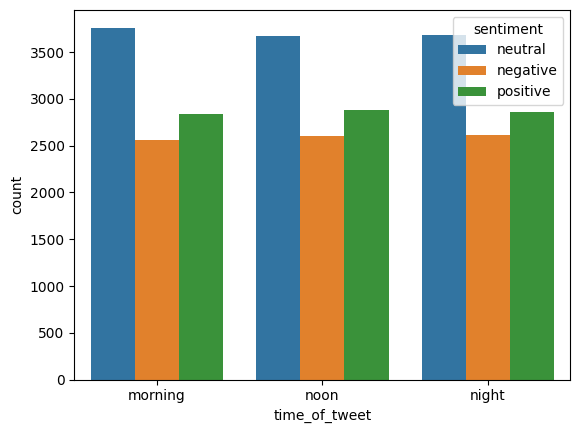

In [14]:
sns.countplot(data=df_train,x='time_of_tweet',hue='sentiment')

<AxesSubplot: xlabel='age_of_user', ylabel='count'>

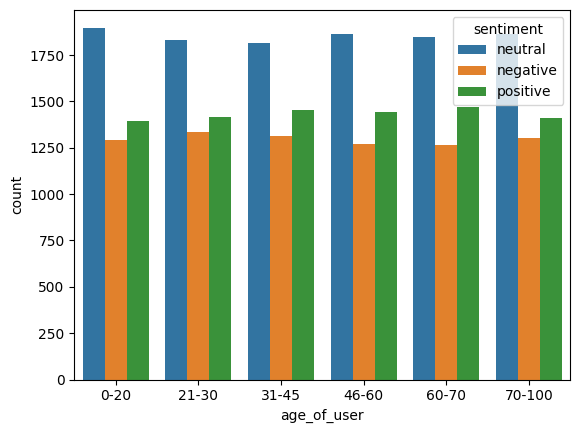

In [15]:
sns.countplot(data=df_train,x='age_of_user',hue='sentiment')

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_train['sentiment_numeric'] = encoder.fit_transform(df_train['sentiment'])
new_df_train = df_train.copy()

for col in df_train.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    new_df_train[col] = encoder.fit_transform(df_train[col])

new_df_train.drop(columns=['textid'], inplace=True)
x = new_df_train.drop(columns=['sentiment','sentiment_numeric'])
y = new_df_train['sentiment_numeric']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Directly using x,y instead of x_train and y_train
model = RandomForestClassifier()
model.fit(x, y)

importance = model.feature_importances_


feature_importances = zip(x.columns, importance)

# Print each feature along with its importance
for feature, importance in feature_importances:
    print(f"{feature}: {importance * 100:.2f}%")





text: 34.14%
selected_text: 35.50%
time_of_tweet: 1.44%
age_of_user: 4.17%
country: 6.35%
population_2020: 6.16%
land_area_km2: 6.22%
density_p_km2: 6.02%


Important features are text , slected text, Country

In [17]:
from nltk.stem import WordNetLemmatizer
def clean_text(text):
    
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    text = re.sub(r'<.*?>', '', text)
    
    text = re.sub(f'[{string.punctuation}]', '', text)
    
    text = re.sub(r'\n', '', text)
    
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    
    text = text.lower()
    
    text = re.sub(r'[^a-z\s]', '', text)
    
    text = re.sub(r'(.)\1+', r'\1\1', text)
  
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Stem words using WordNetLemmatizer
    lemma = WordNetLemmatizer()
    words = [lemma.lemmatize(word) for word in words]

    
    text = ' '.join(words)
    
    return text

df1_train=df_train[['text','sentiment']].copy()

# Ensure the 'text' column is of string type
df1_train['text'] = df1_train['text'].astype(str)



df1_train['text'] = df1_train['text'].apply(clean_text)




In [18]:
print(df1_train.head(10))

                                         text sentiment
0                          id responded going   neutral
1                      soo sad miss san diego  negative
2                                bos bullying  negative
3                       interview leave alone  negative
4      son couldnt put release already bought  negative
5  shameless plugging best ranger forum earth   neutral
6                  feeding baby fun smile coo  positive
7                                    soo high   neutral
8                                               neutral
9   journey wow u became cooler hehe possible  positive


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Encode the labels
encoder = LabelEncoder()

# Vectorize the text column
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1_train['text'])

y = encoder.fit_transform(df1_train['sentiment'])

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model = MultinomialNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test,y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


In [33]:
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import numpy as np

# Predefined hyperparameters for XGBoost optimized for speed
best_params = {
    'n_estimators': 50,
    'learning_rate': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'verbosity': 0,
    'tree_method': 'hist',  # Faster method for large datasets
}

# Initialize the model with predefined parameters
XG_model = XGBClassifier(**best_params)

# Fit the model on the training data with early stopping
XG_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],  # Using test set for early stopping evaluation
              early_stopping_rounds=10,
              verbose=True)

# Predict on the test set
y_pred = XG_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Test set accuracy:", accuracy)
print("Classification Report:\n", report)


c:\Users\modug\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.08591
[1]	validation_0-mlogloss:1.07224
[2]	validation_0-mlogloss:1.06169
[3]	validation_0-mlogloss:1.05108
[4]	validation_0-mlogloss:1.04272
[5]	validation_0-mlogloss:1.03470
[6]	validation_0-mlogloss:1.02752
[7]	validation_0-mlogloss:1.02127
[8]	validation_0-mlogloss:1.01515
[9]	validation_0-mlogloss:1.00987
[10]	validation_0-mlogloss:1.00510
[11]	validation_0-mlogloss:1.00039
[12]	validation_0-mlogloss:0.99602
[13]	validation_0-mlogloss:0.99194
[14]	validation_0-mlogloss:0.98816
[15]	validation_0-mlogloss:0.98440
[16]	validation_0-mlogloss:0.98096
[17]	validation_0-mlogloss:0.97765
[18]	validation_0-mlogloss:0.97447
[19]	validation_0-mlogloss:0.97125
[20]	validation_0-mlogloss:0.96822
[21]	validation_0-mlogloss:0.96572
[22]	validation_0-mlogloss:0.96314
[23]	validation_0-mlogloss:0.96049
[24]	validation_0-mlogloss:0.95789
[25]	validation_0-mlogloss:0.95543
[26]	validation_0-mlogloss:0.95284
[27]	validation_0-mlogloss:0.95074
[28]	validation_0-mlogloss:0.9

In [39]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)  # Use linear kernel for text data
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6995997088791849


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report



logistic_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
logistic_model.fit(X_train, y_train)


y_pred_logistic = logistic_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.6846797671033479
              precision    recall  f1-score   support

           0       0.73      0.56      0.64      1572
           1       0.61      0.79      0.69      2209
           2       0.80      0.66      0.73      1715

    accuracy                           0.68      5496
   macro avg       0.71      0.67      0.68      5496
weighted avg       0.70      0.68      0.68      5496



In [31]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune n_estimators
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6937772925764192
              precision    recall  f1-score   support

           0       0.74      0.56      0.63      1572
           1       0.63      0.77      0.69      2209
           2       0.78      0.72      0.75      1715

    accuracy                           0.69      5496
   macro avg       0.71      0.68      0.69      5496
weighted avg       0.70      0.69      0.69      5496



In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)  # Tune parameters as needed
gbm_model.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm_model.predict(X_test)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))


Gradient Boosting Accuracy: 0.6304585152838428
              precision    recall  f1-score   support

           0       0.78      0.38      0.51      1572
           1       0.54      0.86      0.67      2209
           2       0.78      0.57      0.66      1715

    accuracy                           0.63      5496
   macro avg       0.70      0.60      0.61      5496
weighted avg       0.69      0.63      0.62      5496



In [40]:
import pickle

# Save the model to a file
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(XG_model, model_file)


In [41]:
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)
